In [3]:
#Linear Algebra
height_weight_sge = [70,170,40]
grades = [95,80,75,62]

In [4]:
def vector_add(v,w):
    """相應元素相加"""
    return [v_i + w_i for v_i , w_i in zip(v,w)]

In [5]:
def vector_subtract(v,w):
    return [v_i - w_i for v_i ,w_i in zip(v,w)]

In [6]:
def vector_sum(vectors):
    result = vectors[0]
    for vector in vectors[1:]:
        result = vector_add(result,vector)
    return result

In [8]:
vector_subtract([1,2,3],[4,5,6])

[-3, -3, -3]

In [13]:
import functools 
vector_sum = functools.partial(functools.reduce,vector_add)

In [14]:
vector_sum([[1,2,3],[4,5,6]])

[5, 7, 9]

In [16]:
def scalar_multiply(c,v):
    return [c * v_i for v_i in v ]

In [18]:
scalar_multiply(20,[3,4,5])

[60, 80, 100]

In [20]:
def vector_mean(vectors):
    """計算出一個向量，其元素值為所有向量相應元素的平均"""
    n = len(vectors)
    return scalar_multiply(1/n,vector_sum(vectors))

In [26]:
vector_mean([[3,4,5],[4,5,6]])

[3.5, 4.5, 5.5]

In [28]:
def dot(v,w):
    """v_1*w_1+...+v_n*w_n"""
    return sum(v_i * w_i for v_i , w_i in zip(v,w))

In [29]:
dot ([1,2,3],[4,5,6])

32

In [30]:
def sum_of_squares(v):
    """v_1*v_1+...+v_n*v_n"""
    return dot(v,v)

In [31]:
sum_of_squares([1,2,3,4,5])

55

In [32]:
import math

In [33]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [34]:
magnitude([1,2,3,4,5])

7.416198487095663

In [35]:
def squared_distance(v,w):
    """(v_1-w_1)**2+...+(v_n-w_n)**2"""
    return sum_of_squares(vector_subtract(v,w))

In [43]:
squared_distance([1,2,3],[5,6,7])

48

In [37]:
def distance(v,w):
    return magnitude(vector_subtract(v,w))

In [42]:
distance([1,2,3],[5,6,7])

6.928203230275509

In [44]:
A = [[1,2,3],[4,5,6]]
B = [[1,2],[3,4],[5,6]]

In [45]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0 
    return num_rows,num_cols

In [47]:
shape(B)

(3, 2)

In [48]:
def get_row(A,i):
    return A[i]

In [50]:
get_row(A,1)

[4, 5, 6]

In [51]:
def get_column(A,j):
    return [A_i[j] for A_i in A]

In [52]:
get_column(A,1)

[2, 5]

In [55]:
def make_matrix(num_rows,num_cols,entry_fn):
    """送回一個num_rows x num_cols 的矩陣
    其(i,j)元素是由entry_fn(i,j)決定"""
    return [[entry_fn(i,j) for j in range(num_cols) ]for i in range(num_rows)]

In [58]:
make_matrix(3,3,lambda x,y :x*y )

[[0, 0, 0], [0, 1, 2], [0, 2, 4]]

In [59]:
def is_diagonal(i,j):
    """對角都是1 其餘都是0"""
    return 1 if i == j else 0 

In [60]:
identity_matrix = make_matrix(5,5,is_diagonal)

In [61]:
identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [62]:
#Statistics

In [83]:
import random
from collections import Counter
from matplotlib import pyplot as  plt

In [197]:
num_friends = [random.randint(1,100) + random.randint(0,10)*5 for _ in range(1000)]

In [198]:
friend_counts = Counter(num_friends)
xs = range(max(num_friends))
ys = [friend_counts[x] for x in xs ]

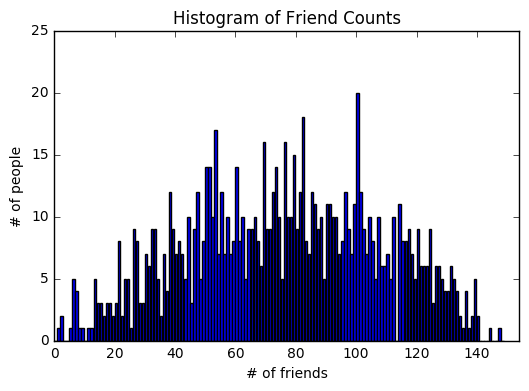

In [216]:
plt.bar(xs,ys)
plt.axis([0,max(num_friends)+5,0,max(ys)+5])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [217]:
num_points = len(num_friends)

In [218]:
num_points

1000

In [219]:
largest_value = max(num_friends)

In [220]:
largest_value

149

In [221]:
smallest_value = min(num_friends)

In [222]:
smallest_value

1

In [223]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]

In [224]:
smallest_value

1

In [225]:
second_smallest_value = sorted_values[1]

In [226]:
second_smallest_value

2

In [227]:
second_largest_value = sorted_values[-2]

In [228]:
second_largest_value

149

In [229]:
def mean(x):
    return sum(x)/len(x)

In [230]:
mean(num_friends)

75.454

In [231]:
def median(v):
    """找出落在v最中央的數值"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n//2
    if n % 2 == 1 :
        return sorted_v[midpoint]
    else:
        #偶數 回傳兩個中央位置數值平均
        lo = midpoint - 1 
        hi = midpoint 
        return (sorted_v[lo] + sorted_v[hi])/2


In [232]:
median(num_friends)

76.0

In [235]:
def quantile(x,p):
    """送回x中正好位於第p個百分比位置的那個數值"""
    p_index = int(p*len(x))
    return sorted(x)[p_index]

In [236]:
quantile(num_friends,0.1)

32

In [237]:
quantile(num_friends,0.25)

51

In [238]:
quantile(num_friends,0.75)

100

In [239]:
quantile(num_friends,0.9)

120

In [254]:
def mode(x):
    """送回一個列表，裡面放的是眾數"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i,count in counts.items() if count == max_count]


In [255]:
mode(num_friends)

[100]

In [256]:
#Dispersion 離散程度

In [257]:
def data_range(x):
    return max(x)-min(x)

In [258]:
data_range(num_friends)

148

In [261]:
def de_mean(x):
    """把x轉換每個元素的平均值差值"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

In [264]:
def variance(x):
    """假設x至少兩個元素"""
    n = len(x)
    if n < 1 :
        print ("Must Have 2 element")
        return 0 
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)

In [265]:
variance(num_friends)

1044.308192192193

In [266]:
def standard_deviation(x):
    return math.sqrt(variance(x))

In [267]:
standard_deviation(num_friends)

32.31575764533756

In [268]:
def interquartile_range(x):
    return quantile(x,0.75) - quantile(x,0.25)


In [269]:
interquartile_range(num_friends)

49

In [270]:
def covariance(x,y):
    n = len(x)
    return dot(de_mean(x),de_mean(y))/(n-1)

In [272]:
daily_minutes = [random.randint(10,100) + random.randint(0,10)*5 for _ in range(1000)]

In [273]:
covariance(num_friends,daily_minutes)

-52.01846446446446

In [275]:
def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    
    if stdev_x > 0 and stdev_y > 0 :
        return covariance(x,y)/stdev_x/stdev_y
    else:
        return 0 
    

In [276]:
correlation(num_friends,daily_minutes)

-0.05376878093457728

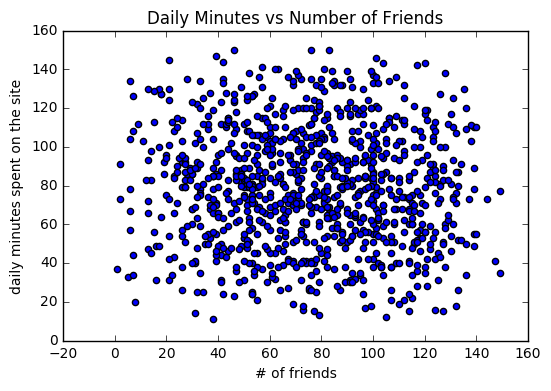

In [279]:
plt.scatter(num_friends,daily_minutes)
plt.title("Daily Minutes vs Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

In [280]:
outlier = num_friends.index(100) #離群值

In [281]:
num_friends_good = [x 
                   for i , x in enumerate(num_friends)
                   if i != outlier ]
daily_minutes_good = [x for i,x in enumerate(daily_minutes) if i != outlier]

In [282]:
correlation(num_friends_good,daily_minutes_good)

-0.05287578834497118

In [283]:
x = [-2,-1,0,1,2]
y = [2,1,0,1,2]

In [286]:
correlation(x,y)

0.0

In [287]:
x = [-2,-1,0,1,2]
y = [99.98,99.99,100,100.01,100.02]

In [288]:
correlation(x,y)

1.0

In [289]:
#Probability


In [290]:
def random_kid():
    return random.choice(["boy","girl"])

In [303]:
both_girls = 0 
older_girl = 0 
either_girl = 0 
random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger =="girl":
        both_girls += 1
    if older == "girl" or younger =="girl":
        either_girl += 1 
        
print("P(both|olfer):",both_girls/older_girl)
print("P(both|either):",both_girls/either_girl)

P(both|olfer): 0.5007089325501317
P(both|either): 0.3311897106109325


In [304]:
def uniform_pdf(x):
    return 1 if x >=0 and x < 1 else 0 

In [305]:
def uniform_cdf(x):
    if x < 0: return 0 
    elif x < 1 : return x 
    else : return 1 

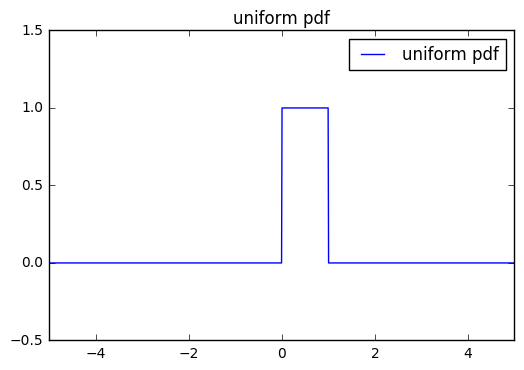

In [313]:
xs = [x / 100.0 for x in range(-500,500)]
plt.plot(xs,[uniform_pdf(x) for x in xs],'-',label="uniform pdf")
plt.axis([min(xs),max(xs),-0.5,1.5])
plt.legend()
plt.title("uniform pdf")
plt.show()

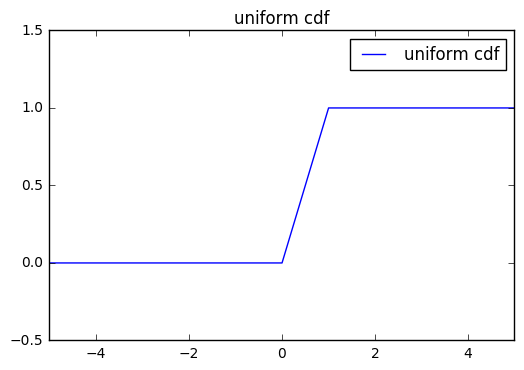

In [315]:
xs = [x / 100.0 for x in range(-500,500)]
plt.plot(xs,[uniform_cdf(x) for x in xs],'-',label="uniform cdf")
plt.axis([min(xs),max(xs),-0.5,1.5])
plt.legend()
plt.title("uniform cdf")
plt.show()

In [316]:
def normal_pdf(x,mu=0,sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu)**2/2/sigma**2)/(sqrt_two_pi*sigma))

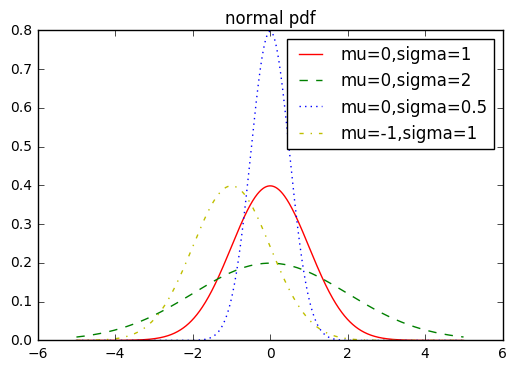

In [322]:
xs = [x / 100.0 for x in range(-500,500)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'r-',label="mu=0,sigma=1")
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'g--',label="mu=0,sigma=2")
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],'b:',label="mu=0,sigma=0.5")
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'y-.',label="mu=-1,sigma=1")
plt.legend()
plt.title("normal pdf")
plt.show()

In [323]:
def normal_cdf(x,mu=0,sigma=1):
    return ( 1+math.erf((x-mu)/math.sqrt(2)/sigma))/2

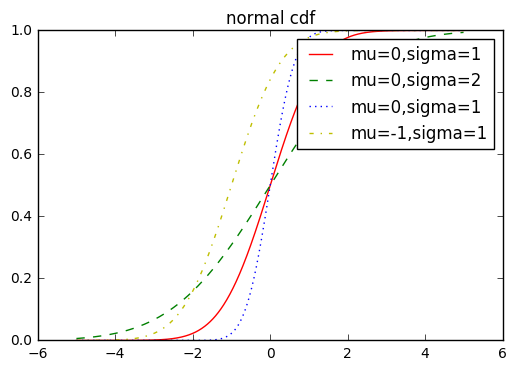

In [321]:
xs = [x / 100.0 for x in range(-500,500)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'r-',label="mu=0,sigma=1")
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'g--',label="mu=0,sigma=2")
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],'b:',label="mu=0,sigma=0.5")
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'y-.',label="mu=-1,sigma=1")
plt.legend()
plt.title("normal cdf")
plt.show()

In [326]:
def inverse_normal_cdf(p,mu=0,sigma=1,tolerance=0.00001):
    #如果不是標準常態分佈，就先轉換成標準常態分佈
    if mu !=0 or sigma != 1 :
        return mu + sigma * inverse_normal_cdf(p,tolerance=tolerance)
    
    low_z,low_p = -10.0,0 #normal_cdf(-10) 趨近0
    hi_z,hi_p = 10.0,1    #normal_cdf(10) 趨近1
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) /2
        mid_p = normal_cdf(mid_z)
        if mid_p < p :
            low_z,low_p = mid_z,mid_p
        elif mid_p > p :
            hi_z,hi_p = mid_z,mid_p
        else:
            break
    return mid_z
    

In [336]:
inverse_normal_cdf(-2)

-9.999990463256836

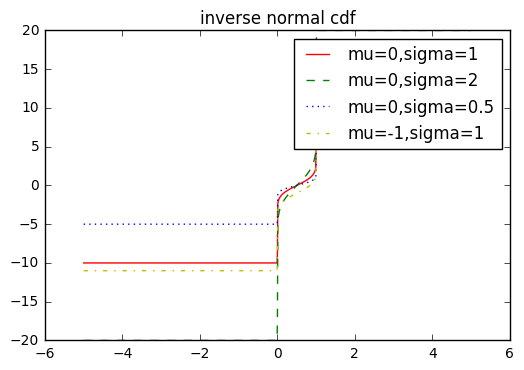

In [344]:
xs = [x / 100.0 for x in range(-500,500)]
plt.plot(xs,[inverse_normal_cdf(x,sigma=1) for x in xs],'r-',label="mu=0,sigma=1")
plt.plot(xs,[inverse_normal_cdf(x,sigma=2) for x in xs],'g--',label="mu=0,sigma=2")
plt.plot(xs,[inverse_normal_cdf(x,sigma=0.5) for x in xs],'b:',label="mu=0,sigma=0.5")
plt.plot(xs,[inverse_normal_cdf(x,mu=-1) for x in xs],'y-.',label="mu=-1,sigma=1")
plt.legend()
plt.title("inverse normal cdf")
plt.show()

In [345]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0 

In [349]:
def binomial(n,p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [358]:
def make_hist(p,n,num_points):
    data = [binomial(n,p) for _ in range(num_points)]
    
    #用長條圖呈現二項式取樣結果
    histogram = Counter(data)
    plt.bar([x-0.4 for x in histogram.keys()],
           [v/num_points for v in histogram.values()],
           0.8,
           color='0.75')
    mu = p * n 
    sigma = math.sqrt(n*p*(1-p))
    xs = range(min(data),max(data)+1)
    ys = [normal_cdf(i + 0.5,mu,sigma)- normal_cdf(i-0.5,mu,sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs Normal Approximation")
    plt.show()

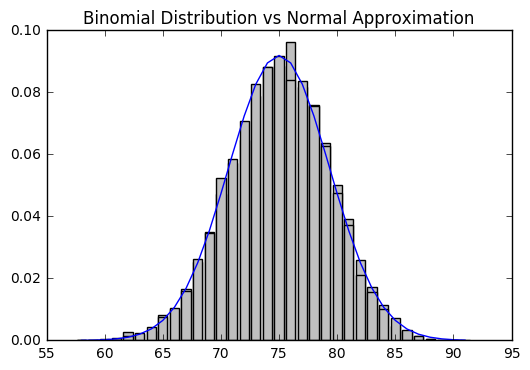

In [359]:
make_hist(0.75,100,10000)